In [2]:
import numpy as np

class Perceptron:
    def __init__(self, input_size, learning_rate = 0.01, epochs = 100):
        self.learning_rate = learning_rate
        self.weights = np.random.rand(input_size + 1)
        self.epochs = epochs
        self.errors = []

    def activation_function(self, x):
        return 1 if x >=0 else 0
    def predict(self, x):
        weighted_sum = np.dot(x, self.weights[1:]) + self.weights[0]
        return self.activation_function(weighted_sum)
    def train(self, training_data, labels):
        for _ in range(self.epochs):
            total_error = 0
            for data, label in zip(training_data, labels):
                prediction = self.predict(data)
                error = label - prediction
                total_error += int(error != 0)

                self.weights[1:] += self.learning_rate*error*data
                self.weights[0] += self.learning_rate*error
            self.errors.append(total_error)

            if _%10 == 0:
                print(_," ",total_error)

            if(total_error == 0):
                print("converged early")
                break

In [3]:
training_data = np.array([[0,0],[0,1],[1,0],[1,1]])
labels = np.array([[0],[1],[1],[1]])
perceptron = Perceptron(2, 0.01, 100)
perceptron.train(training_data, labels)

0   1
10   1
20   1
30   1
40   1
50   1
converged early


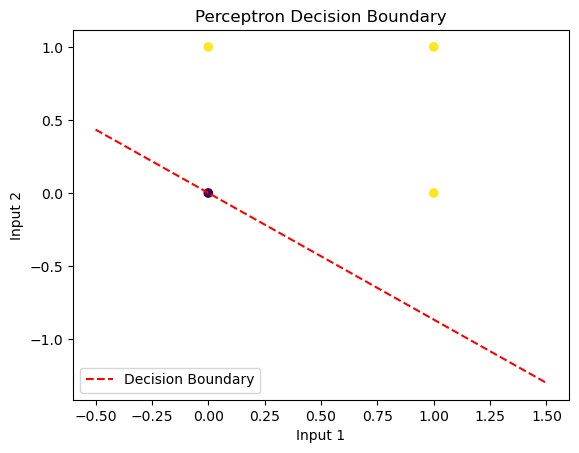

In [4]:
import matplotlib.pyplot as plt 
plt.scatter(training_data[:, 0], training_data[:, 1], c=labels, cmap='viridis', marker='o')
x_vals = np.linspace(-0.5, 1.5, 100)
y_vals = (-perceptron.weights[1] * x_vals - perceptron.weights[0]) / perceptron.weights[2]
plt.plot(x_vals, y_vals, 'r--', label='Decision Boundary')
plt.title('Perceptron Decision Boundary')
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.legend()
plt.show()